In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [23]:
data = pd.read_csv("train.csv")
db_test = pd.read_csv("test.csv")

In [24]:
to_std=['Id','LotArea']

#for i in [db,db_test]:
#    i=i.drop(list,axis=1, inplace = True)


In [27]:
data[to_std] =(data[to_std] - data[to_std].mean())/data[to_std].std()
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730272,60,RL,65.0,-0.207071,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,-1.727900,20,RL,80.0,-0.091855,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,-1.725528,60,RL,68.0,0.073455,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,-1.723156,70,RL,60.0,-0.096864,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,-1.720785,60,RL,84.0,0.375020,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Data exploration

In [26]:
db.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,731.500000,56.897260,70.049958,10517.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,2.000000,20.000000,21.000000,1301.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,366.750000,20.000000,59.000000,7554.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,731.500000,50.000000,69.000000,9479.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1096.250000,70.000000,80.000000,11602.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1461.000000,190.000000,313.000000,215246.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
db.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
db.shape

(1460, 81)

(from kaggle kernel) We can see there are some outliers and do not make too much sense, since
normally the price would increase as the area increase. Then we drop these two observations.

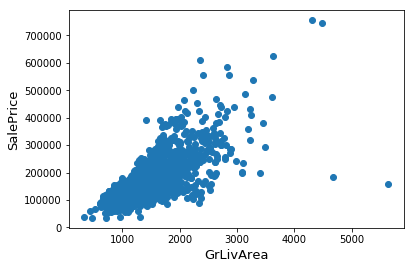

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = db['GrLivArea'], y = db['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

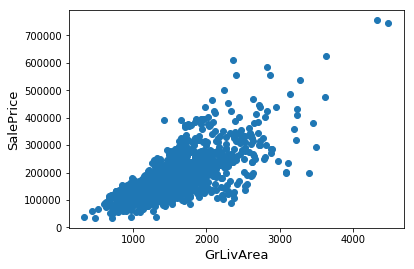

In [7]:
db = db.drop(db[(db['GrLivArea']>4000) & (db['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(db['GrLivArea'], db['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# 2. Data cleaning

Let's check the missing values

In [8]:
db.isnull().sum()
db_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

From above we can see that there are some columns have many missing vlaues. In order to not make the missing value miss lead our prediction, I am going to drop all the columns that have over 400 missing values. 

In [9]:
db = db.drop(['Alley', 'FireplaceQu', "PoolQC", 'Fence','MiscFeature'], axis=1)

In [10]:
test = db_test.drop(['Alley', 'FireplaceQu', "PoolQC", 'Fence','MiscFeature'], axis=1)

Since the Year, Quality, Condition, Class variables do not have much numeric meaning, we turn these variables into catogocial variabes.(We compared the result if we keep these variables as numberic variable, and we found this method would make some improvements in the result)

In [11]:
db["YearRemodAdd"] =db["YearRemodAdd"].astype('category')
db["OverallQual"]= db["OverallQual"].astype('category')
db["GarageYrBlt"] =db["GarageYrBlt"].astype('category')
db["YearBuilt"] =db["YearBuilt"].astype('category')
db["YrSold"] =db["YrSold"].astype('category')
db["MoSold"] =db["MoSold"].astype('category')
db["OverallCond"] =db["OverallCond"].astype('category')
db["MSSubClass"] =db["MSSubClass"].astype('category')

In [12]:
test["YearRemodAdd"] =test["YearRemodAdd"].astype('category')
test["OverallQual"]= test["OverallQual"].astype('category')
test["GarageYrBlt"] =test["GarageYrBlt"].astype('category')
test["YearBuilt"] =test["YearBuilt"].astype('category')
test["YrSold"] =test["YrSold"].astype('category')
test["MoSold"] =test["MoSold"].astype('category')
test["OverallCond"] =test["OverallCond"].astype('category')
test["MSSubClass"] =test["MSSubClass"].astype('category')

Before we impute the missing values, we do the partition to avoid leakage.

In [13]:
from sklearn.cross_validation import train_test_split
train, valid = train_test_split(db, test_size=0.4, random_state=123)

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


now check the missing value again.

In [14]:
train.isnull().sum()
valid.isnull().sum()
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
                ... 
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Functional         2
Fireplaces         0
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual   

Since we need to add some noise to the numeric variables, we have to check the variable type first.

In [15]:
db.dtypes

Id                  int64
MSSubClass       category
MSZoning           object
LotFrontage       float64
LotArea             int64
Street             object
LotShape           object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual      category
OverallCond      category
YearBuilt        category
YearRemodAdd     category
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterQual          object
ExterCond          object
Foundation         object
BsmtQual           object
                   ...   
BsmtFullBath        int64
BsmtHalfBath        int64
FullBath            int64
HalfBath            int64
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual        object
TotRmsAbvGrd

For the missing values, we assign them with new values according to the frequency of those non missing values, which make the values have simlar distribution after we impute the missing values. For those variables with large numeric values, we add more noise to them than those with small numeric values. 

In [16]:
#for categorical variables
for column in ["MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional",
              "SaleType","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","Electrical",
               "BsmtFinType1","GarageYrBlt","GarageType","GarageFinish","GarageQual","GarageCond"]:
    train[column]=train[column].fillna(np.random.choice(train[column].dropna()))
    valid[column]=valid[column].fillna(np.random.choice(valid[column].dropna()))
    test[column]=test[column].fillna(np.random.choice(test[column].dropna()))
    
#for large numeric variables
for column in ["GarageArea","TotalBsmtSF",
               "BsmtFinSF1","LotFrontage","BsmtFinSF2","BsmtUnfSF",
               "MasVnrArea"]:
    train[column]=train[column].fillna(np.random.choice(train[column].dropna()+np.random.normal(0,5)))
    valid[column]=valid[column].fillna(np.random.choice(valid[column].dropna()+np.random.normal(0,5)))
    test[column]=test[column].fillna(np.random.choice(test[column].dropna()+np.random.normal(0,5)))

    
#for small numeric variables  
for column in ["GarageCars","BsmtFullBath","BsmtHalfBath"]:
    train[column]=train[column].fillna(np.random.choice(train[column].dropna()+np.random.normal(0,1)))
    valid[column]=valid[column].fillna(np.random.choice(valid[column].dropna()+np.random.normal(0,1)))
    test[column]=test[column].fillna(np.random.choice(test[column].dropna()+np.random.normal(0,1)))

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [17]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Series([], dtype: float64)

In [18]:
null_columns=valid.columns[valid.isnull().any()]
valid[null_columns].isnull().sum()

Series([], dtype: float64)

In [19]:
null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

Series([], dtype: float64)

now we have already impute all missing values

# 3. Feature engineering

At first, we try using target encoding to those categorical variable, but the result was not satisfying. We can skip this step because when we use H2O to fit the model, it would do taget encoding automatically.

When we explore the data earlier, we find there is many variables related to area and room, then we add new colums from these variables. And we find this step help improve the prediction.

In [20]:
train["TotalLivingArea"] = train["TotalBsmtSF"]+train["1stFlrSF"]+train["2ndFlrSF"]+train["GrLivArea"]+train["GarageArea"]+train["WoodDeckSF"]+train["OpenPorchSF"]+train["EnclosedPorch"]+train["ScreenPorch"]
valid["TotalLivingArea"] = valid["TotalBsmtSF"]+valid["1stFlrSF"]+valid["2ndFlrSF"]+valid["GrLivArea"]+valid["GarageArea"]+valid["WoodDeckSF"]+valid["OpenPorchSF"]+valid["EnclosedPorch"]+valid["ScreenPorch"]
test["TotalLivingArea"] = test["TotalBsmtSF"]+test["1stFlrSF"]+test["2ndFlrSF"]+test["GrLivArea"]+test["GarageArea"]+test["WoodDeckSF"]+test["OpenPorchSF"]+test["EnclosedPorch"]+test["ScreenPorch"]

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
train["TotalBathRoom"]= train["FullBath"]+ 0.5*train["HalfBath"]+train["BsmtFullBath"]
valid["TotalBathRoom"]= valid["FullBath"]+ 0.5*valid["HalfBath"]+valid["BsmtFullBath"]
test["TotalBathRoom"]= test["FullBath"]+ 0.5*test["HalfBath"]+test["BsmtFullBath"]

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Then we check the correlation of the variables, we would like to drop those variables with low correlations to the target vairbles. Before that, we move the target variable to the last column for convenience.

In [22]:
train["saleprice"]=train["SalePrice"]
valid["saleprice"]=valid["SalePrice"]

del train["SalePrice"]
del valid["SalePrice"]

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
train.corr().shape

(32, 32)

In [24]:
train.corr().loc[:,'saleprice']

Id                -0.001988
LotFrontage        0.358163
LotArea            0.294882
MasVnrArea         0.511030
BsmtFinSF1         0.451497
BsmtFinSF2        -0.009869
BsmtUnfSF          0.189042
TotalBsmtSF        0.660329
1stFlrSF           0.634111
2ndFlrSF           0.350363
LowQualFinSF      -0.045951
GrLivArea          0.747910
BsmtFullBath       0.257092
BsmtHalfBath      -0.000481
FullBath           0.558944
HalfBath           0.308518
BedroomAbvGr       0.176533
KitchenAbvGr      -0.143006
TotRmsAbvGrd       0.527837
Fireplaces         0.458162
GarageCars         0.619264
GarageArea         0.616241
WoodDeckSF         0.340680
OpenPorchSF        0.314820
EnclosedPorch     -0.133317
3SsnPorch          0.072230
ScreenPorch        0.072998
PoolArea           0.136192
MiscVal           -0.008206
TotalLivingArea    0.847967
TotalBathRoom      0.648221
saleprice          1.000000
Name: saleprice, dtype: float64

In [25]:
ycor=train.corr().iloc[31:32,:32]
ycor


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalLivingArea,TotalBathRoom,saleprice
saleprice,-0.001988,0.358163,0.294882,0.51103,0.451497,-0.009869,0.189042,0.660329,0.634111,0.350363,...,0.34068,0.31482,-0.133317,0.07223,0.072998,0.136192,-0.008206,0.847967,0.648221,1.0


In [26]:
# we find using 0.4 as threshold would achive better result than 0.2,0.3,0.45 and 0.5
to_drop = ["Id"] #[column for column in ycor.columns if any(abs(ycor[column] )<0.4)]
to_drop

['Id']

In [27]:
for i in to_drop:
    del train[i]
    del valid[i]
    del test[i]

In [28]:
train.corr().shape

(31, 31)

Also we found multicollinearity among some variables, but no matter we use principle component or simply use feature selection, the methods did not make a better result when we removed those highly correlated variables.

Then we looked at the scale of all numeric variables. To avoid some varibles dominate the model, we standardize numeric variables. In this part, we attempted using winsorizing and binning, but none of the methods helped with the accuracy of the prediction.

In [29]:
train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalLivingArea,TotalBathRoom,saleprice
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,...,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,70.812137,10349.395881,102.562298,451.702517,47.450801,548.252860,1047.406178,1155.274600,337.422197,5.548055,...,96.734554,43.685355,20.075515,3.083524,16.003432,2.806636,25.286041,4680.758581,2.174485,180205.909611
std,20.631971,8448.666468,181.498973,438.568149,169.501535,437.242572,422.511347,375.907035,432.100741,46.568828,...,129.268337,63.557142,59.473107,27.785607,57.117461,41.834128,172.413560,1467.606084,0.795276,82825.684186
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000,1.000000,34900.000000
25%,60.000000,7500.000000,0.000000,0.000000,0.000000,212.000000,796.000000,869.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3711.250000,1.500000,128500.000000
50%,73.000000,9434.500000,0.000000,398.500000,0.000000,440.500000,992.000000,1079.500000,0.000000,0.000000,...,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4512.000000,2.000000,160000.000000
75%,79.137158,11700.000000,160.000000,727.000000,0.000000,800.250000,1294.750000,1393.500000,720.000000,0.000000,...,168.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5440.750000,2.500000,213000.000000
max,182.000000,164660.000000,1378.000000,2188.000000,1474.000000,2336.000000,3200.000000,3228.000000,2065.000000,528.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,2500.000000,12410.000000,5.000000,755000.000000


In [30]:
numeric = train.corr().columns
numeric

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'TotalLivingArea', 'TotalBathRoom', 'saleprice'],
      dtype='object')

In [31]:
for col_name in list(set(numeric)-set(["saleprice"])):
    new_col_name = col_name + '_std'
    train[col_name] = np.log1p(train[col_name])# seems it would improve the result a little bit
    train[new_col_name] =(train[col_name] - train[col_name].mean())/train[col_name].std()

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
train = train.drop(list(set(numeric)-set(["saleprice"])), axis =1)

In [33]:
for col_name in list(set(numeric)-set(["saleprice"])):
    test[col_name] = np.log1p(test[col_name])
    new_col_name = col_name + '_std'
    test[new_col_name] = (test[col_name] - test[col_name].mean())/test[col_name].std()

In [34]:
test = test.drop(list(set(numeric)-set(["saleprice"])), axis =1)

In [35]:
for col_name in list(set(numeric)-set(["saleprice"])):
    valid[col_name] = np.log1p(valid[col_name])
    new_col_name = col_name + '_std'
    valid[new_col_name] = (valid[col_name] - valid[col_name].mean())/valid[col_name].std()

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [36]:
valid= valid.drop(list(set(numeric)-set(["saleprice"])), axis=1)

Also, the dependent variable is right skewed, so we are going to transfer it to make it more normally distributed

In [37]:
train["saleprice"] = np.log1p(train["saleprice"])

In [38]:
valid["saleprice"] = np.log1p(valid["saleprice"])

# 4. Fit the model

we use three method here, the first one would be the gbm model.(In most of our trial, this is the better model than the random forest, penalized linear regression and neural network.)

In [39]:
y = 'saleprice'
X = [name for name in train.columns if name not in ['Id',y]]

In [40]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [41]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 mins 35 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.3
H2O cluster version age:,3 months and 22 days !!!
H2O cluster name:,H2O_from_python_zengweihao_kly3ag
H2O cluster total nodes:,1
H2O cluster free memory:,1.761 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [42]:
trainhf = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
validationhf = h2o.H2OFrame(valid)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [44]:
testhf = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [47]:
valid.describe()

,saleprice,TotalBathRoom_std,PoolArea_std,Fireplaces_std,MiscVal_std,TotRmsAbvGrd_std,LotFrontage_std,LotArea_std,GrLivArea_std,ScreenPorch_std,...,FullBath_std,TotalLivingArea_std,GarageCars_std,GarageArea_std,BedroomAbvGr_std,KitchenAbvGr_std,HalfBath_std,2ndFlrSF_std,EnclosedPorch_std,OpenPorchSF_std
count,584.000000,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,...,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02
mean,12.036692,-1.019504e-14,-1.631353e-16,-1.045207e-15,1.400136e-16,6.275422e-16,-6.024671e-15,1.405554e-15,1.816051e-14,-2.380136e-16,...,2.433366e-17,1.638339e-15,-4.373975e-15,8.539592e-16,-3.148034e-14,-1.571717e-14,-1.717804e-15,-4.246983e-16,4.096799e-16,1.001482e-15
std,0.388111,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,10.542733,-1.714730e+00,-5.856883e-02,-1.057138e+00,-2.082480e-01,-2.978333e+00,-2.551796e+00,-3.629941e+00,-2.345878e+00,-2.804357e-01,...,-4.042481e+00,-3.175488e+00,-3.059909e+00,-4.138222e+00,-5.853565e+00,-8.116360e+00,-7.806831e-01,-8.893888e-01,-4.316931e-01,-1.123167e+00
25%,11.802049,-1.134934e-01,-5.856883e-02,-1.057138e+00,-2.082480e-01,-1.019587e+00,-7.560643e-01,-3.820697e-01,-7.593286e-01,-2.804357e-01,...,-9.920381e-01,-7.519301e-01,-9.049151e-01,-3.339236e-02,-1.029259e+00,-1.749979e-01,-7.806831e-01,-8.893888e-01,-4.316931e-01,-1.123167e+00
50%,12.025755,-1.134934e-01,-5.856883e-02,6.668843e-01,-2.082480e-01,-2.749069e-01,2.049923e-01,8.385895e-02,7.887994e-02,-2.804357e-01,...,7.923565e-01,5.340518e-02,3.556755e-01,2.361671e-01,2.340318e-01,-1.749979e-01,-7.806831e-01,-8.893888e-01,-4.316931e-01,4.370976e-01
75%,12.278398,4.952685e-01,-5.856883e-02,6.668843e-01,-2.082480e-01,3.701646e-01,7.188905e-01,4.548433e-01,7.095171e-01,-2.804357e-01,...,7.923565e-01,7.002703e-01,3.556755e-01,3.662871e-01,2.340318e-01,-1.749979e-01,1.237329e+00,1.109367e+00,-4.316931e-01,8.835143e-01
max,13.275829,3.232600e+00,1.718458e+01,2.390906e+00,6.932202e+00,2.715585e+00,4.118901e+00,6.417748e+00,2.866674e+00,4.241274e+00,...,2.058405e+00,2.566380e+00,1.943832e+00,9.883224e-01,2.691458e+00,7.766364e+00,2.417790e+00,1.380076e+00,2.842982e+00,1.759195e+00


In [46]:
train.describe()

,saleprice,TotalBathRoom_std,PoolArea_std,Fireplaces_std,MiscVal_std,TotRmsAbvGrd_std,LotFrontage_std,LotArea_std,GrLivArea_std,ScreenPorch_std,...,FullBath_std,TotalLivingArea_std,GarageCars_std,GarageArea_std,BedroomAbvGr_std,KitchenAbvGr_std,HalfBath_std,2ndFlrSF_std,EnclosedPorch_std,OpenPorchSF_std
count,874.000000,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,...,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02
mean,12.015545,-3.300714e-14,1.178818e-16,-1.555074e-15,-4.731786e-17,-8.260733e-14,-5.903617e-16,-2.196010e-14,-1.147817e-14,-1.579591e-16,...,-6.740603e-15,-1.760936e-14,-2.060874e-14,3.024151e-15,-7.621160e-15,8.408733e-14,-1.546945e-15,-1.186567e-15,4.899462e-16,1.458787e-15
std,0.407281,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,10.460271,-1.659842e+00,-6.775116e-02,-9.840305e-01,-1.778044e-01,-4.085118e+00,-3.532204e+00,-3.654843e+00,-4.259753e+00,-3.008521e-01,...,-4.160001e+00,-5.955979e+00,-2.988391e+00,-3.896250e+00,-5.716992e+00,-2.288108e-01,-7.590736e-01,-8.541675e-01,-3.855245e-01,-1.038074e+00
25%,11.763692,-7.974221e-01,-6.775116e-02,-9.840305e-01,-1.778044e-01,-8.998403e-01,-3.633557e-01,-3.354593e-01,-6.828108e-01,-3.008521e-01,...,-1.014110e+00,-5.751282e-01,-8.401373e-01,2.534373e-02,-9.747609e-01,-2.288108e-01,-7.590736e-01,-8.541675e-01,-3.855245e-01,-1.038074e+00
50%,11.982935,-9.277395e-02,-6.775116e-02,8.033574e-01,-1.778044e-01,-1.914586e-01,2.369335e-01,9.927281e-02,5.051965e-02,-3.008521e-01,...,8.261178e-01,3.820184e-02,4.165107e-01,2.622650e-01,2.670372e-01,-2.288108e-01,-7.590736e-01,-8.541675e-01,-3.855245e-01,4.258967e-01
75%,12.269052,5.029976e-01,-6.775116e-02,8.033574e-01,-1.778044e-01,4.221695e-01,4.845005e-01,5.070098e-01,6.139145e-01,-3.008521e-01,...,8.261178e-01,6.258311e-01,4.165107e-01,3.876880e-01,2.670372e-01,-2.288108e-01,1.275398e+00,1.150845e+00,-3.855245e-01,9.037198e-01
max,13.534474,2.586146e+00,1.518585e+01,2.590745e+00,6.710958e+00,3.310868e+00,3.050283e+00,5.517083e+00,3.399608e+00,3.983449e+00,...,2.131780e+00,3.214763e+00,1.999700e+00,8.927599e-01,3.767470e+00,7.417643e+00,2.465487e+00,1.471594e+00,3.411784e+00,1.906343e+00


In [45]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
hyper_parameters = {'ntrees':list(range(0, 600, 20)),
                    'max_depth':list(range(0, 30, 3)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':50,
                   'max_runtime_secs':3000}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)
gsearch.train(x=X,
              y=y,
              training_frame=trainhf,
              validation_frame=validationhf)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: max_depth, 0
Hyper-parameter: ntrees, 340
Hyper-parameter: sample_rate, 0.3
failure_details: Illegal argument(s) for GBM model: Grid_GBM_Key_Frame__upload_90b8c0fbb1320a6883d3e61b43be4c04.hex_model_python_1529958854978_3_model_3.  Details: ERRR on field: _max_depth: _max_depth must be > 0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: Grid_GBM_Key_Frame__upload_90b8c0fbb1320a6883d3e61b43be4c04.hex_model_python_1529958854978_3_model_3.  Details: ERRR on field: _max_depth: _max_depth must be > 0.

	at water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:20)
	at hex.tree.gbm.GBM.init(GBM.java:84)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:202)
	at hex.ModelBuilder$

In [48]:

# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.5         3    180         0.9   
1                0.8         3    140         0.5   
2                0.5        12     40         0.9   
3                0.3         9    380         0.3   
4                0.9         3    240         0.2   
5                0.5        12     40         0.7   
6                0.7         3    360         0.2   
7                0.2        12    560         0.4   
8                0.4        18    320         0.7   
9                0.3        24    460         0.7   
10               0.1         9    300         0.7   
11               1.0         3     40         0.5   
12               0.8        12    260         0.9   
13               0.9        18    180         0.9   
14               0.8         6     80         0.9   
15               0.3         3    440         0.1   
16               1.0        15     80         0.9   
17               1.0         6    320         

,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-25 16:39:16,1 min 23.920 sec,0.0,0.4070479,0.3161218,0.1656880,0.3883551,0.3003526,0.1508197
,2018-06-25 16:39:16,1 min 23.924 sec,1.0,0.3762082,0.2907940,0.1415326,0.3568800,0.2738630,0.1273633
,2018-06-25 16:39:16,1 min 23.927 sec,2.0,0.3490385,0.2677038,0.1218279,0.3309389,0.2511937,0.1095206
,2018-06-25 16:39:16,1 min 23.930 sec,3.0,0.3239276,0.2463634,0.1049291,0.3071807,0.2312877,0.0943600
,2018-06-25 16:39:16,1 min 23.934 sec,4.0,0.3015150,0.2269974,0.0909113,0.2868253,0.2136199,0.0822687
---,---,---,---,---,---,---,---,---,---
,2018-06-25 16:39:17,1 min 24.657 sec,176.0,0.0605895,0.0420160,0.0036711,0.1250835,0.0912842,0.0156459
,2018-06-25 16:39:17,1 min 24.661 sec,177.0,0.0605154,0.0419124,0.0036621,0.1250918,0.0913213,0.0156480
,2018-06-25 16:39:17,1 min 24.666 sec,178.0,0.0604012,0.0418332,0.0036483,0.1251348,0.0913758,0.0156587
,2018-06-25 16:39:17,1 min 24.670 sec,179.0,0.0602513,0.0417464,0.0036302,0.1252655,0.0914956,0.0156915



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual,221.7216034,1.0,0.3070993
TotalLivingArea_std,202.2606354,0.9122279,0.2801446
Neighborhood,90.7864609,0.4094615,0.1257454
ExterQual,53.4011726,0.2408479,0.0739642
TotalBathRoom_std,17.8201466,0.0803717,0.0246821
---,---,---,---
3SsnPorch_std,0.0,0.0,0.0
LowQualFinSF_std,0.0,0.0,0.0
BsmtFinSF2_std,0.0,0.0,0.0
FullBath_std,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [47]:
final = gbm_model.predict(testhf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Condition2' has levels not trained on: [Artery, PosA]
  warnings.warn(w)
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'RoofStyle' has levels not trained on: [Shed]
  warnings.warn(w)
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'ExterCond' has levels not trained on: [Po]
  warnings.warn(w)


In [48]:
h2o.download_csv(final, "kaggle1.csv")

The second model we use is neural network

In [49]:
import h2o 
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

In [50]:
%matplotlib inline

In [51]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 mins 03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.3
H2O cluster version age:,3 months and 4 days
H2O cluster name:,H2O_from_python_zengweihao_uz5iy3
H2O cluster total nodes:,1
H2O cluster free memory:,1.679 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [52]:
train_nn = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [53]:
test_nn = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [54]:
validation_nn = h2o.H2OFrame(valid)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [55]:
y = 'saleprice'
X = [name for name in train_nn.columns if name not in ['Id', y]]
print(y)
print(X)

saleprice
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'TotalBathRoom_std', 'PoolArea_std', 'Fireplaces_std', 'MiscVal_std', 'TotRmsAbvGrd_std', 'LotFrontage_std', 'LotArea_std', 'GrLivArea_std', 'ScreenPorch_std', 'WoodDeckSF_std', '3SsnPorch_std', 'BsmtFullBath_std', 'BsmtFinSF1_std', 'BsmtUnfSF_std', 'LowQualFinSF_std', '1stFlrSF_std', 'TotalBsmtSF_std', 'BsmtHalfBath_std', 'BsmtFinSF2_std', 'MasVnrArea_std',

In [56]:
# NN with random hyperparameter search
# train many different NN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden':[[170, 320], [80, 190], [320, 160, 80], [100], [50, 50, 50, 50]],
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':50,
                   'max_runtime_secs':3000}

# initialize grid search
gsearch = H2OGridSearch(H2ODeepLearningEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train_nn,
              validation_frame=validation_nn)

# view detailed results at http://localhost:54321/flow/index.html

deeplearning Grid Build progress: |███████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: hidden, [50, 50, 50, 50]
Hyper-parameter: input_dropout_ratio, 0.1
Hyper-parameter: l1, 0.09
Hyper-parameter: l2, 0.001
failure_details: DistributedException from /127.0.0.1:54321: '

Trying to predict with an unstable model.
Job was aborted due to observed numerical instability (exponential growth).
Either the weights or the bias values are unreasonably large or lead to large activation values.
Try a different initial distribution, a bounded activation function (Tanh), adding regularization
(via max_w2, l1, l2, dropout) or learning rate (either enable adaptive_rate or use a smaller learning rate or faster annealing).

For more information visit:
  http://jira.h2o.ai/browse/TN-4'
failure_stack_traces: DistributedException from /127.0.0.1:54321: '

Trying to predict with an unstable model.
Job was aborted due to observed numerical instability (expo


Hyper-parameter: hidden, [320, 160, 80]
Hyper-parameter: input_dropout_ratio, 0.1
Hyper-parameter: l1, 0.09
Hyper-parameter: l2, 0.001
failure_details: DistributedException from /127.0.0.1:54321: '

Trying to predict with an unstable model.
Job was aborted due to observed numerical instability (exponential growth).
Either the weights or the bias values are unreasonably large or lead to large activation values.
Try a different initial distribution, a bounded activation function (Tanh), adding regularization
(via max_w2, l1, l2, dropout) or learning rate (either enable adaptive_rate or use a smaller learning rate or faster annealing).

For more information visit:
  http://jira.h2o.ai/browse/TN-4'
failure_stack_traces: DistributedException from /127.0.0.1:54321: '

Trying to predict with an unstable model.
Job was aborted due to observed numerical instability (exponential growth).
Either the weights or the bias values are unreasonably large or lead to large activation values.
Try a diffe


Hyper-parameter: hidden, [320, 160, 80]
Hyper-parameter: input_dropout_ratio, 0.16
Hyper-parameter: l1, 0.08
Hyper-parameter: l2, 0.004
failure_details: DistributedException from /127.0.0.1:54321: '

Trying to predict with an unstable model.
Job was aborted due to observed numerical instability (exponential growth).
Either the weights or the bias values are unreasonably large or lead to large activation values.
Try a different initial distribution, a bounded activation function (Tanh), adding regularization
(via max_w2, l1, l2, dropout) or learning rate (either enable adaptive_rate or use a smaller learning rate or faster annealing).

For more information visit:
  http://jira.h2o.ai/browse/TN-4'
failure_stack_traces: DistributedException from /127.0.0.1:54321: '

Trying to predict with an unstable model.
Job was aborted due to observed numerical instability (exponential growth).
Either the weights or the bias values are unreasonably large or lead to large activation values.
Try a diff

In [57]:
# show grid search results
gsearch.show()

# select best model
nn_model = gsearch.get_grid()[0]

# print model information
nn_model

                hidden input_dropout_ratio    l1     l2  \
0       [320, 160, 80]                0.04   0.0  0.009   
1     [50, 50, 50, 50]                0.08  0.01  0.001   
2           [170, 320]                0.18   0.0  0.006   
3                [100]                0.02  0.02  0.003   
4                [100]                 0.0   0.0    0.0   
5                [100]                0.04  0.02    0.0   
6            [80, 190]                0.04  0.01  0.003   
7       [320, 160, 80]                0.12  0.01  0.009   
8           [170, 320]                 0.1  0.01  0.001   
9     [50, 50, 50, 50]                0.14  0.01  0.007   
10           [80, 190]                0.18   0.0  0.005   
11               [100]                0.18  0.06  0.005   
12               [100]                0.08  0.05  0.008   
13               [100]                0.16  0.06  0.003   
14    [50, 50, 50, 50]                0.16  0.01  0.004   
15          [170, 320]                0.16  0.03  0.009 

,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,validation_rmse,validation_deviance,validation_mae
,2018-06-07 10:52:36,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2018-06-07 10:52:36,14.533 sec,2195 obs/sec,1.0,1,874.0,0.1353768,0.0183269,0.1030793,0.1389002,0.0192933,0.1027437
,2018-06-07 10:52:39,17.082 sec,3125 obs/sec,10.0,10,8740.0,0.0828448,0.0068633,0.0586167,0.1280824,0.0164051,0.0917152


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Neighborhood.Crawfor,1.0,1.0,0.0047460
Functional.Min2,0.9851204,0.9851204,0.0046754
HouseStyle.SLvl,0.9827643,0.9827643,0.0046642
SaleCondition.AdjLand,0.9776146,0.9776146,0.0046398
BsmtCond.Fa,0.9764498,0.9764498,0.0046343
---,---,---,---
LandSlope.missing(NA),0.0,0.0,0.0
GarageFinish.missing(NA),0.0,0.0,0.0
Utilities.missing(NA),0.0,0.0,0.0
CentralAir.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


# initialize nn model
nn_model = H2ODeepLearningEstimator(
    epochs=70,                    # read over the data 70 times, but in mini-batches
    hidden=[300],                 # 300 hidden units in 1 hidden layer
    input_dropout_ratio=0.2,      # randomly drop 20% of inputs for each iteration, helps w/ generalization
    hidden_dropout_ratios=[0.05], # randomly set 5% of hidden weights to 0 each iteration, helps w/ generalization
    activation='TanhWithDropout', # bounded activation function that allows for dropout, tanh
    l1=0.001,                     # L1 penalty can help generalization   
    l2=0.01,                      # L2 penalty can increase stability in presence of highly correlated inputs
    adaptive_rate=True,           # adjust magnitude of weight updates automatically (+stability, +accuracy)
    stopping_rounds=5,            # stop after validation error does not decrease for 5 iterations
    score_each_iteration=True,    # score validation error on every iteration
    model_id='nn_model')          # for easy lookup in flow

# train nn model
nn_model.train(
    x=X,
    y=y,
    training_frame=train_nn,
    validation_frame=validation_nn)

# print model information
nn_model


In [58]:
nn_model =nn_model.predict(test_nn)

deeplearning prediction progress: |███████████████████████████████████████| 100%


/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Condition2' has levels not trained on: [Artery, PosA]
  warnings.warn(w)
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'RoofStyle' has levels not trained on: [Shed]
  warnings.warn(w)
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'ExterCond' has levels not trained on: [Po]
  warnings.warn(w)


In [59]:
h2o.download_csv(nn_model, "kaggle2.csv")

The third one is random forest

In [60]:
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [61]:
%matplotlib inline

In [62]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 mins 04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.3
H2O cluster version age:,3 months and 4 days
H2O cluster name:,H2O_from_python_zengweihao_uz5iy3
H2O cluster total nodes:,1
H2O cluster free memory:,1.580 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [63]:
train_random = h2o.H2OFrame(train)
validation_random = h2o.H2OFrame(valid)
test_random = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [64]:
y = 'saleprice'
X = [name for name in train_nn.columns if name not in ['Id', y]]
print(y)
print(X)

saleprice
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'TotalBathRoom_std', 'PoolArea_std', 'Fireplaces_std', 'MiscVal_std', 'TotRmsAbvGrd_std', 'LotFrontage_std', 'LotArea_std', 'GrLivArea_std', 'ScreenPorch_std', 'WoodDeckSF_std', '3SsnPorch_std', 'BsmtFullBath_std', 'BsmtFinSF1_std', 'BsmtUnfSF_std', 'LowQualFinSF_std', '1stFlrSF_std', 'TotalBsmtSF_std', 'BsmtHalfBath_std', 'BsmtFinSF2_std', 'MasVnrArea_std',

In [65]:
estimator = H2ORandomForestEstimator(
    # Stops fitting new trees when 10-tree rolling average is within 0.00001
    stopping_rounds = 10,
    stopping_tolerance = 0.00001,
    stopping_metric = 'auto',
    score_each_iteration = True,
    balance_classes = True,
    seed = 7)

hyper_parameters = {'ntrees':list(range(0, 600, 20)),
                    'max_depth':list(range(0, 30, 3))}

            
# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':50,
                   'max_runtime_secs':3000,
                   "stopping_rounds": 10,
                   "stopping_tolerance": 0.00001,
                   "stopping_metric": "misclassification"}
  

gsearch = H2OGridSearch(H2ORandomForestEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)
gsearch.train(x=X,
              y=y,
              training_frame=train_random,
              validation_frame=validation_random)

drf Grid Build progress: |████████████████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: max_depth, 0
Hyper-parameter: ntrees, 120
failure_details: Illegal argument(s) for DRF model: Grid_DRF_Key_Frame__upload_87e8f9ad417f2701650d3532e24241c6.hex_model_python_1528383017787_3_model_0.  Details: ERRR on field: _max_depth: _max_depth must be > 0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DRF model: Grid_DRF_Key_Frame__upload_87e8f9ad417f2701650d3532e24241c6.hex_model_python_1528383017787_3_model_0.  Details: ERRR on field: _max_depth: _max_depth must be > 0.

	at water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:20)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:204)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:206)
	at hex.ModelBuilder.trainModelNested(ModelBuilder.java:262)
	at hex.gri

In [66]:
# show grid search results
gsearch.show()

# select best model
rf_model = gsearch.get_grid()[0]

# print model information
rf_model

     max_depth ntrees  \
0           12    560   
1           27    520   
2           18    240   
3           21    400   
4           12    320   
5           18    440   
6            9    460   
7           21    480   
8           21     40   
9           15    240   
10           9    260   
11          18    320   
12           9    560   
13          12     60   
14          15    420   
15          18    400   
16          18    580   
17          27    120   
18          27    420   
19          21    220   
20          21    180   
21          24    520   
22          24    100   
23           9    480   
24           9    320   
25           9    180   
26          21    460   
27          27     80   
28          12     80   
29          24     40   
30           6    500   
31          18     20   
32           6    580   
33           6    420   
34           6    320   
35           6    260   
36           6    100   
37           6    120   
38           3    260   


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-07 10:55:57,2 min 33.886 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-06-07 10:55:57,2 min 33.906 sec,1.0,0.2359786,0.1657632,0.0556859,0.2335097,0.1623345,0.0545268
,2018-06-07 10:55:57,2 min 33.931 sec,2.0,0.2173170,0.1552156,0.0472267,0.1971173,0.1423462,0.0388552
,2018-06-07 10:55:57,2 min 33.951 sec,3.0,0.2167901,0.1514279,0.0469980,0.1760017,0.1293534,0.0309766
,2018-06-07 10:55:57,2 min 33.971 sec,4.0,0.2019047,0.1414137,0.0407655,0.1640061,0.1197770,0.0268980
---,---,---,---,---,---,---,---,---,---
,2018-06-07 10:56:01,2 min 37.787 sec,121.0,0.1309428,0.0879403,0.0171460,0.1320309,0.0957978,0.0174322
,2018-06-07 10:56:01,2 min 37.832 sec,122.0,0.1309742,0.0878898,0.0171542,0.1321293,0.0958495,0.0174581
,2018-06-07 10:56:01,2 min 37.880 sec,123.0,0.1307348,0.0878596,0.0170916,0.1320467,0.0957810,0.0174363
,2018-06-07 10:56:05,2 min 41.916 sec,368.0,0.1294649,0.0867390,0.0167612,0.1321166,0.0957991,0.0174548



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual,15721.8505859,1.0,0.2457389
TotalLivingArea_std,15597.2968750,0.9920777,0.2437921
Neighborhood,9133.5195312,0.5809443,0.1427606
GrLivArea_std,3459.8166504,0.2200642,0.0540783
ExterQual,3272.0651855,0.2081221,0.0511437
---,---,---,---
MiscVal_std,4.3075809,0.0002740,0.0000673
Condition2,3.9128695,0.0002489,0.0000612
PoolArea_std,3.5906289,0.0002284,0.0000561
Street,0.5444480,0.0000346,0.0000085



See the whole table with table.as_data_frame()


In [67]:
predict_random=rf_model.predict(test_random)

drf prediction progress: |████████████████████████████████████████████████| 100%


/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Condition2' has levels not trained on: [Artery, PosA]
  warnings.warn(w)
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'RoofStyle' has levels not trained on: [Shed]
  warnings.warn(w)
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'ExterCond' has levels not trained on: [Po]
  warnings.warn(w)


In [68]:
h2o.download_csv(predict_random, "kaggle3.csv")

In [69]:
h2o.cluster().shutdown(prompt=False)


H2O session _sid_ab1e closed.


In [70]:
pred1 = pd.read_csv("kaggle1.csv")
pred2 = pd.read_csv("kaggle2.csv")
pred3 = pd.read_csv("kaggle3.csv")

pred1 = np.expm1(pred1)   # we took the log of saleprice before we fit the model
pred2 = np.expm1(pred2)
pred3 = np.expm1(pred3)

# 5. Model Aggregation:
Below we are going to take the average of all the models' prediction to get our final values of the housing price. Doing this improved our predicting comparing with using a single model's prediction for the housing price.

In [71]:
final = pd.concat([pred1,pred2,pred3],axis=1)

In [72]:
final["SalePrice"]= final.mean(axis=1)

In [73]:
final1 = final.drop("predict",axis =1 )

In [74]:
final1.shape

(1459, 1)

In [75]:
final1.to_csv("kaggle_sumit.csv")

These files with prediction need manipulation using Excel, so that we can upload to Kaggle.
And we score 0.12455 and rank #1121.

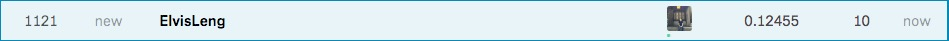